# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

## Step 0. 데이터베이스와 SQL

### 데이터베이스란


### SQL과 Query


## Step 1. 데이터셋 준비하기

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [71]:
import os

In [72]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] =  'puddinghong'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [73]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d hugomathien/soccer
!unzip *.zip

soccer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  soccer.zip
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         


### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [74]:
import sqlite3

In [75]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect('database.sqlite')

In [76]:
df_country = pd.read_sql_query('SELECT * FROM Country', conn)
df_league = pd.read_sql_query('SELECT * FROM League', conn)
df_match = pd.read_sql_query('SELECT * FROM Match', conn)
df_player = pd.read_sql_query('SELECT * FROM Player', conn)
df_player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', conn)
df_team = pd.read_sql_query('SELECT * FROM Team', conn)
df_team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', conn)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [8]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [9]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [10]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [12]:
df_player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [13]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [14]:
df_team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### 문제 5. 데이터프레임간의 관계 파악하기


In [15]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인

플레이어 정보를 확인해보자

In [16]:
df_player_att.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


여기서 player_api_id는 선수의 경기 일정에 따라 중복 값(횟수)가 달라진다.   
각 선수의 경기 횟수를 확인해보자

In [17]:
df_player_att['player_api_id'].value_counts()

41269     56
210278    56
42116     55
26472     54
179795    53
          ..
33688      2
470720     2
37366      2
9144       2
240561     2
Name: player_api_id, Length: 11060, dtype: int64

각 선수는 많게는 56번 적게는 2번 경기에 출전하였음을 알 수 있다.

df_player_att의 플레이어 정보와 df_match의 플레이어 정보의 관계를 확인해보자.   


In [18]:
# away player :  원정선수
df_match['away_player_1']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
25974    462944.0
25975     42276.0
25976     10637.0
25977    274776.0
25978    156175.0
Name: away_player_1, Length: 25979, dtype: float64

away_player_1은 Nan값도 있고 데이터 타입이 float이다.   
Nan값은 제거하고 데이터형은 int로 바꿔보자.

In [77]:
df_match['away_player_1'].dropna().apply(int)

144       34480
145       37937
146       38252
147       36835
148      104378
          ...  
25974    462944
25975     42276
25976     10637
25977    274776
25978    156175
Name: away_player_1, Length: 24745, dtype: int64

이제 away_player_1의 id를 player_api_id로 바꿔서 매치해보자.   
먼저 df_player_att의 overall_rating의 평균을 player_api_id를 그룹화하여 구해보자.   



In [78]:
df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()

0

위 코드에서 map은 시리즈를 받게 된다.   
map이 받은 시리즈가 매핑하는 테이블이 된다.

결측치를 확인했을 때 0이 나왔다는 뜻은 away_player_1에 있는 id값이 player_api_id에 전부 있다는 뜻이다.

팀 정보도 확인해보자.   
overall_rating대신 builUpPlaySpeed를 썼다.

In [21]:
df_team_att['team_api_id'].value_counts()

8588      6
8640      6
9864      6
8661      6
8456      6
         ..
8262      1
6351      1
8242      1
274581    1
6631      1
Name: team_api_id, Length: 288, dtype: int64

In [22]:
df_match['home_team_api_id']

0         9987
1        10000
2         9984
3         9991
4         7947
         ...  
25974    10190
25975     9824
25976     9956
25977     7896
25978    10192
Name: home_team_api_id, Length: 25979, dtype: int64

In [23]:
df_match['home_team_api_id'].isna().sum()

0

home_team_api_id는 Nan값도 없고 int형이므로 dropna와 apply할 필요 x

In [79]:
df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

home_team_api_id에 매핑되지 않은 team_api_id가 178개 존재함. (df_team_att가 값이 부족한 것임)

### 문제 6. 선수 특성 사이의 상관성 파악하기

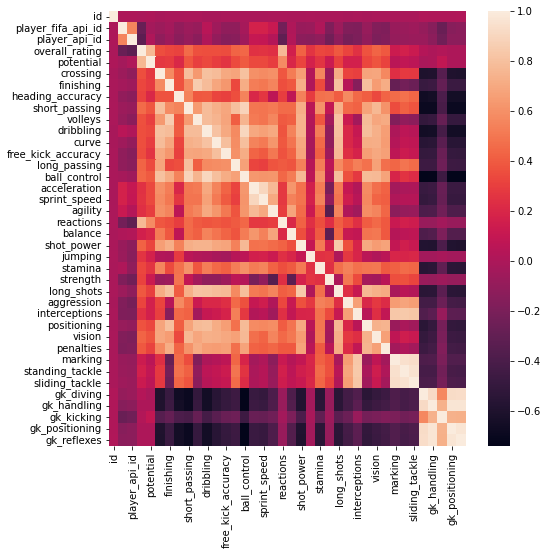

In [80]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
plt.figure(figsize =(8,8))
sns.heatmap(df_player_att.corr())

위 heatmap에서 overall_rating와 다른 요소 간의 상관성을 확인해보자.   
id는 관계 없으므로 drop시킨다.

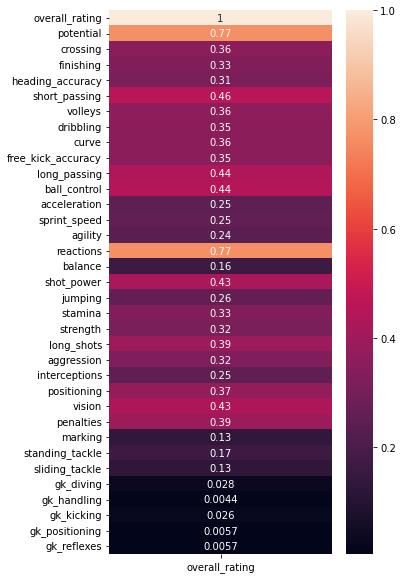

In [81]:
# annot = True 로 상관성을 수치로 나타낸다.
plt.figure(figsize =(5,10))
sns.heatmap(df_player_att.drop(['id','player_fifa_api_id','player_api_id'], axis = 1).corr()[['overall_rating']], annot = True)

overall_rating에 영향을 주는 요소로는   
potential, reactions 가 가장 큰 영향을 주고 그 다음으로는   
short_passing, long_passing, ball_control, shot_power, vision 등이 있다.

골키퍼와 관련된 요소(gk_...)는 골키퍼와만 관련이 있어 전체적으로 봤을 때의 상관도는 낮게 나온다.

### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [27]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기

team_api_id를 기준으로 묶어서 통합해야 한다.   
먼저 df_team_att의 컬럼들을 확인해보자.

In [28]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

buildUpPlayDribbling은 결측치가 많으므로 drop해야하고,   전체 컬럼은 object형과 int, float형이 섞여있다.

먼저 buildUpPlayDribbling을 drop한다.

In [29]:
df_team_att.drop('buildUpPlayDribbling', axis = 1, inplace = True)

In [30]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

team_api_id로 묶을 때 수치형은 평균을 사용하고 범주형(object)은 최빈값을 사용하자.   
먼저 최빈값을 구하는 함수를 생성한다.

In [82]:
def most(x) :      # x에 시리즈 전달
  return x.value_counts().index[0]      #  시리즈에서 value_counts해서 첫번째(최빈) 값 반환

위 코드에서 index[0] 부분은 아래 참조    

In [83]:
df_team_att['buildUpPlaySpeedClass'].value_counts()

Balanced    1184
Fast         172
Slow         102
Name: buildUpPlaySpeedClass, dtype: int64

이제 team_ap_id를 기준으로 통합해보자.

In [84]:
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [85]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
        'buildUpPlaySpeed' : 'mean',
       'buildUpPlaySpeedClass' : most,
       'buildUpPlayDribblingClass' : most,
       'buildUpPlayPassing' : 'mean',
       'buildUpPlayPassingClass' : most,
       'buildUpPlayPositioningClass' : most,
       'chanceCreationPassing' : 'mean',
       'chanceCreationPassingClass' : most,
       'chanceCreationCrossing' : 'mean',
       'chanceCreationCrossingClass' : most,
       'chanceCreationShooting' : 'mean',
       'chanceCreationShootingClass' : most,
       'chanceCreationPositioningClass' : most,
       'defencePressure' : 'mean',
       'defencePressureClass' : most,
       'defenceAggression' : 'mean',
       'defenceAggressionClass' : most,
       'defenceTeamWidth' : 'mean',
       'defenceTeamWidthClass' : most,
       'defenceDefenderLineClass' : most
    }
)

mean은 따옴표 안에 쓰고 most는 그냥 쓴 이유는   


In [86]:
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Lots,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Balanced,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


team_api_id를 기준으로 데이터가 묶였으므로 df_match에 통합시킬 수 있다.   
df_match에서 home_team_goal과 away_team_goal을 copy한 새 데이터 프레임을 만들고   
여기에 team_map을 연결시켜보자

In [87]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

team 정보를 새 df에 저장해야한다.   
team_api_id가 key가 되고 각 컬럼 값이 value가 됨.   
하나씩 추가해야하므로 for문 이용

In [88]:
# 출력값 확인용 코드
# home_team 혹은 away_team에서
for team in ['home_',  'away_'] :
  # team_map의 컬럼 하나씩 받아옴
  for col in team_map.columns:
    print(team + col)

home_buildUpPlaySpeed
home_buildUpPlaySpeedClass
home_buildUpPlayDribblingClass
home_buildUpPlayPassing
home_buildUpPlayPassingClass
home_buildUpPlayPositioningClass
home_chanceCreationPassing
home_chanceCreationPassingClass
home_chanceCreationCrossing
home_chanceCreationCrossingClass
home_chanceCreationShooting
home_chanceCreationShootingClass
home_chanceCreationPositioningClass
home_defencePressure
home_defencePressureClass
home_defenceAggression
home_defenceAggressionClass
home_defenceTeamWidth
home_defenceTeamWidthClass
home_defenceDefenderLineClass
away_buildUpPlaySpeed
away_buildUpPlaySpeedClass
away_buildUpPlayDribblingClass
away_buildUpPlayPassing
away_buildUpPlayPassingClass
away_buildUpPlayPositioningClass
away_chanceCreationPassing
away_chanceCreationPassingClass
away_chanceCreationCrossing
away_chanceCreationCrossingClass
away_chanceCreationShooting
away_chanceCreationShootingClass
away_chanceCreationPositioningClass
away_defencePressure
away_defencePressureClass
away_defen

In [89]:
for team in ['home_' , 'away_']:
  # team_map에  home_team_api_id, away_team_api_id 인덱스로 추가
  team_map.index.name = team + 'team_api_id'
  # team_map에 컬럼들에 대해
  for col in team_map.columns:
    # team_map의 인덱스와 매핑
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [90]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.666667,Balanced,Little,60.333333,Mixed,Organised,54.666667,Normal,58.833333,Normal,61.333333,Normal,Organised,51.500000,Medium,57.500000,Press,56.500000,Normal,Cover


In [91]:
# 결측치 확인
df.isna().sum()

home_team_goal                           0
away_team_goal                           0
home_buildUpPlaySpeed                  178
home_buildUpPlaySpeedClass             178
home_buildUpPlayDribblingClass         178
home_buildUpPlayPassing                178
home_buildUpPlayPassingClass           178
home_buildUpPlayPositioningClass       178
home_chanceCreationPassing             178
home_chanceCreationPassingClass        178
home_chanceCreationCrossing            178
home_chanceCreationCrossingClass       178
home_chanceCreationShooting            178
home_chanceCreationShootingClass       178
home_chanceCreationPositioningClass    178
home_defencePressure                   178
home_defencePressureClass              178
home_defenceAggression                 178
home_defenceAggressionClass            178
home_defenceTeamWidth                  178
home_defenceTeamWidthClass             178
home_defenceDefenderLineClass          178
away_buildUpPlaySpeed                  178
away_buildU

In [92]:
df.dropna(inplace = True)

In [93]:
# 확인
df.isna().sum()

home_team_goal                         0
away_team_goal                         0
home_buildUpPlaySpeed                  0
home_buildUpPlaySpeedClass             0
home_buildUpPlayDribblingClass         0
home_buildUpPlayPassing                0
home_buildUpPlayPassingClass           0
home_buildUpPlayPositioningClass       0
home_chanceCreationPassing             0
home_chanceCreationPassingClass        0
home_chanceCreationCrossing            0
home_chanceCreationCrossingClass       0
home_chanceCreationShooting            0
home_chanceCreationShootingClass       0
home_chanceCreationPositioningClass    0
home_defencePressure                   0
home_defencePressureClass              0
home_defenceAggression                 0
home_defenceAggressionClass            0
home_defenceTeamWidth                  0
home_defenceTeamWidthClass             0
home_defenceDefenderLineClass          0
away_buildUpPlaySpeed                  0
away_buildUpPlaySpeedClass             0
away_buildUpPlay

### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)

In [94]:
# df에서 home_team_goal과 away_team_goal을 비교하여 승패 확인
# home_team_goal과 away_team_goal만 잘라내어 새 컬럼 생성
df['matchResult'] =  df[['home_team_goal',  'away_team_goal']].aggregate(lambda x : 0 if  x[0] > x[1] else 1 if x[0] == x[1] else 2, axis =1)

In [95]:
df['matchResult']

0        1
1        1
2        2
3        0
5        1
        ..
25972    1
25974    0
25975    2
25976    0
25978    0
Name: matchResult, Length: 25629, dtype: int64

In [96]:
# 사용하지 않을 컬럼 drop
df.drop(['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)

In [97]:
df

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,1
1,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,55.166667,Normal,53.500000,Normal,Organised,48.666667,Medium,46.000000,Press,55.666667,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,1
25974,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,45.200000,Normal,44.400000,Normal,Organised,43.800000,Medium,45.600000,Press,50.800000,Normal,Cover,56.600000,Balanced,Little,35.800000,Mixed,Organised,63.200000,Normal,36.400000,Normal,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,0
25975,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,53.000000,Normal,46.000000,Normal,Organised,42.000000,Medium,33.000000,Contain,58.000000,Normal,Cover,51.833333,Balanced,Little,52.500000,Mixed,Organised,53.000000,Normal,48.333333,Normal,61.000000,Normal,Organised,48.000000,Me

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

범주형 컬럼 확인 -> 'Class' 로 끝나는 컬럼

In [98]:
df.columns

Index(['home_buildUpPlaySpeed', 'home_buildUpPlaySpeedClass',
       'home_buildUpPlayDribblingClass', 'home_buildUpPlayPassing',
       'home_buildUpPlayPassingClass', 'home_buildUpPlayPositioningClass',
       'home_chanceCreationPassing', 'home_chanceCreationPassingClass',
       'home_chanceCreationCrossing', 'home_chanceCreationCrossingClass',
       'home_chanceCreationShooting', 'home_chanceCreationShootingClass',
       'home_chanceCreationPositioningClass', 'home_defencePressure',
       'home_defencePressureClass', 'home_defenceAggression',
       'home_defenceAggressionClass', 'home_defenceTeamWidth',
       'home_defenceTeamWidthClass', 'home_defenceDefenderLineClass',
       'away_buildUpPlaySpeed', 'away_buildUpPlaySpeedClass',
       'away_buildUpPlayDribblingClass', 'away_buildUpPlayPassing',
       'away_buildUpPlayPassingClass', 'away_buildUpPlayPositioningClass',
       'away_chanceCreationPassing', 'away_chanceCreationPassingClass',
       'away_chanceCreationCrossi

find함수   
- 문자열에서만 사용 가능
- 찾는 문자가 문자열에 있으면 해당 위치 index 반환
   - string.find(찾을 문자)   
   - string.find(찾을 문자, 시작 index)   
   - string.find(찾을 문자, 시작 index, 끝 index)

In [99]:
# find함수로 Class찾아서 index값 반환
# lambda로 find에서 받은 값이 0이상이면(Class가 존재하면) True값 부여
# filter로 True값만 반환
# list로 변환
# 범주형 컬럼만 저장한 변수 생성
col_cats = list(filter(lambda s: s.find('Class') >=0, df.columns))
col_cats

['home_buildUpPlaySpeedClass',
 'home_buildUpPlayDribblingClass',
 'home_buildUpPlayPassingClass',
 'home_buildUpPlayPositioningClass',
 'home_chanceCreationPassingClass',
 'home_chanceCreationCrossingClass',
 'home_chanceCreationShootingClass',
 'home_chanceCreationPositioningClass',
 'home_defencePressureClass',
 'home_defenceAggressionClass',
 'home_defenceTeamWidthClass',
 'home_defenceDefenderLineClass',
 'away_buildUpPlaySpeedClass',
 'away_buildUpPlayDribblingClass',
 'away_buildUpPlayPassingClass',
 'away_buildUpPlayPositioningClass',
 'away_chanceCreationPassingClass',
 'away_chanceCreationCrossingClass',
 'away_chanceCreationShootingClass',
 'away_chanceCreationPositioningClass',
 'away_defencePressureClass',
 'away_defenceAggressionClass',
 'away_defenceTeamWidthClass',
 'away_defenceDefenderLineClass']

get_dummies는 범주형 데이터를 수치형 데이터로 바꿔줌   
1.  사용할 데이터 프레임 생성   
2. get_dummies 처리 -> 결측치를 제외하고 0과 1로 구성된 더미값 생성   
3. 결측값 처리(dummy_na = True 옵션) -> Nan을 생성하여 결측값도 인코딩하여 처리

drop_first : 첫 번째 카테고리 값은 Multicollinearity 때문에 drop


In [100]:
# 범주형 컬럼만 모아둔 데이터 프레임 생성
df_cats = pd.get_dummies(df[col_cats], drop_first = True)
df_cats

,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,home_chanceCreationShootingClass_Normal,home_chanceCreationPositioningClass_Organised,home_defencePressureClass_High,home_defencePressureClass_Medium,home_defenceAggressionClass_Double,home_defenceAggressionClass_Press,home_defenceTeamWidthClass_Normal,home_defenceTeamWidthClass_Wide,home_defenceDefenderLineClass_Offside Trap,away_buildUpPlaySpeedClass_Fast,away_buildUpPlaySpeedClass_Slow,away_buildUpPlayDribblingClass_Normal,away_buildUpPlayPassingClass_Mixed,away_buildUpPlayPassingClass_Short,away_buildUpPlayPositioningClass_Organised,away_chanceCreationPassingClass_Risky,away_chanceCreationPassingClass_Safe,away_chanceCreationCrossingClass_Lots,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
2,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,0,1,1,0,0
3,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0
5,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25974,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25975,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0
25976,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0


### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data = X_scaled, index = X_num.index, columns = X_num.columns)

X_cat = df_cats
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

### 문제 11. 학습데이터와 테스트데이터 분리하기


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1)

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 문제 13. 모델 학습 결과 평가하기


In [107]:
from sklearn.metrics import classification_report

In [108]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred =  model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.49      0.87      0.63      3484
           1       0.24      0.00      0.00      1972
           2       0.44      0.31      0.36      2233

    accuracy                           0.48      7689
   macro avg       0.39      0.39      0.33      7689
weighted avg       0.41      0.48      0.39      7689



정확도가 낮은 이유를 파악해야함   
(학습 데이터가 부족한지, 모델이 학습을 못한 건지)

In [109]:
# y_test 개수 대비 0, 1, 2 개수
print(sum(y_test == 0) / len(y_test ))
print(sum(y_test == 1) / len(y_test ))
print(sum(y_test == 2) / len(y_test ))

0.4531148393809338
0.2564702822213552
0.290414878397711


### 문제 14. XGBoost 모델 생성/학습하기


In [110]:
from xgboost import XGBClassifier

In [111]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

### 문제 15. 모델 학습 결과 평가하기


In [112]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.90      0.65      3484
           1       0.31      0.01      0.01      1972
           2       0.51      0.32      0.40      2233

    accuracy                           0.50      7689
   macro avg       0.44      0.41      0.35      7689
weighted avg       0.46      0.50      0.41      7689



## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

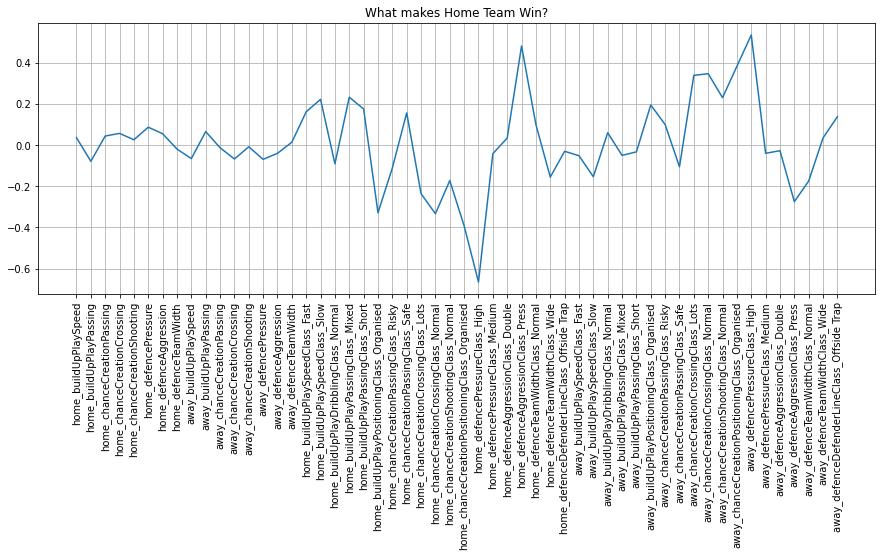

In [113]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()
plt.title('What makes Home Team Win?')
plt.plot(X.columns, model_lr.coef_[0])

- away팀이 방어할수록 home팀 승률이 높음
- away팀이 cross를 잘 못 만들면 home팀 승률이 높음

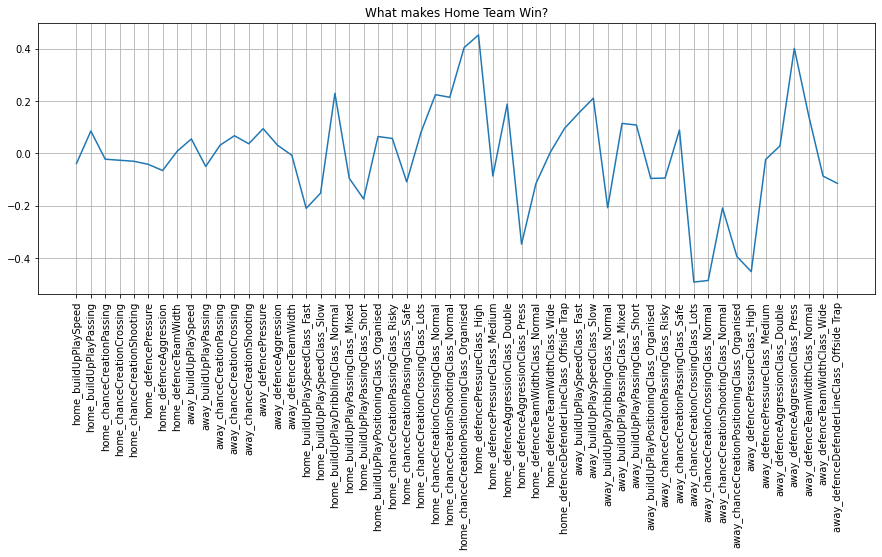

In [114]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()
plt.title('What makes Home Team Win?')
plt.plot(X.columns, model_lr.coef_[2])

- 수치형보다 범주형 데이터가 승패에 더 많은 영향을 끼친다.

### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

<BarContainer object of 54 artists>

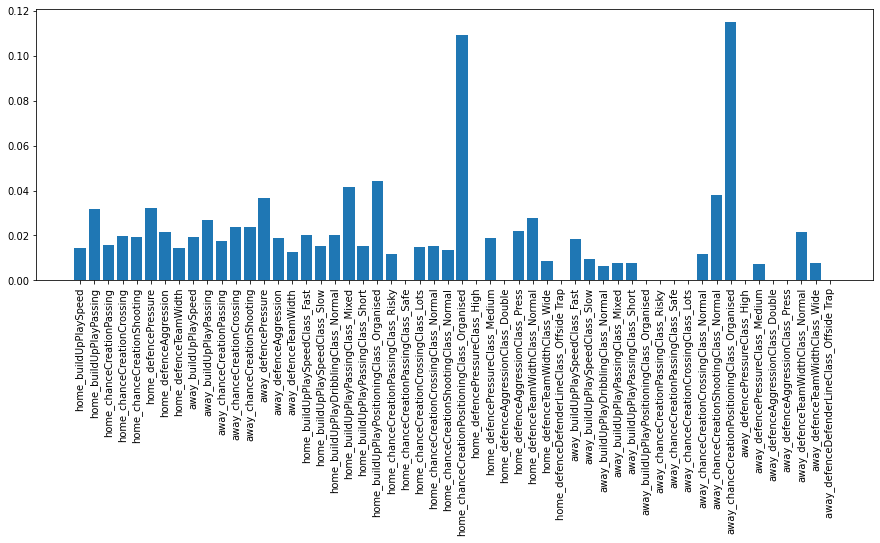

In [115]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(X.columns, model_xgb.feature_importances_)

## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

team은 home/away 두 개로 분류되지만 선수는 각 팀 별 11명씩 존재하여   
선수 특성을 다 넣으려고 하면 feature가 너무 많아지는 문제가 있다. 
   
   feature가 너무 많아지면 고차원에서 정보를 다루어 학습이 되지 않는 문제가 생길 수 있다.   
      
  좋은 feature는 유효한 정보를 compact하게 나타내야 한다.

In [130]:
df_player_att

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


player_api_id 중복값 있음 -> groupby로 그룹화 필요   
골키퍼에 대한 정보 제외해야함   
overall_rating 정보만 추가   

In [118]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [119]:
for team in ['home_' , 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [120]:
df.dropna(inplace = True)

In [121]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


In [124]:
# 선수 별 경기 횟수 확인
df_player_att['player_api_id'].value_counts()

41269     56
210278    56
42116     55
26472     54
179795    53
          ..
33688      2
470720     2
37366      2
9144       2
240561     2
Name: player_api_id, Length: 11060, dtype: int64

In [139]:
# 선수 경기 별 overall_rating 평균값 구하기
player_map = df_player_att.groupby('player_api_id').mean()['overall_rating']
player_map

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [142]:
# df에 선수 data 추가
'''
선수가 home인지 away인지,
1~11 번 선수 구분
'''
# s는 home/away, idx는 선수 번호
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1, 12)):
  print(col)

home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
away_player_5
away_player_6
away_player_7
away_player_8
away_player_9
away_player_10
away_player_11


In [143]:
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1, 12)):
  df[col + '_rating'] = df_match[col].map(player_map)

In [144]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_player_1_rating,home_player_2_rating,home_player_3_rating,home_player_4_rating,home_player_5_rating,home_player_6_rating,home_player_7_rating,home_player_8_rating,home_player_9_rating,home_player_10_rating,home_player_11_rating,away_player_1_rating,away_player_2_rating,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,55.833333,Normal,Organised,49.166667,Medium,50.666667,Press,59.833333,Normal,Cover,46.000000,Balanced,Little,41.500000,Mixed,Organised,46.000000,Normal,53.500000,Normal,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,41.500000,Normal,Organised,48.666667,Medium,56.166667,Press,47.833333,Normal,Cover,64.000000,Balanced,Little,53.500000,Mixed,Organised,44.000000,Normal,47.666667,Normal,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,48.000000,Normal,Organised,60.166667,Medium,49.666667,Press,64.666667,Normal,Cover,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.500000,Risky,55.000000,Normal,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,44.166667,Normal,Organised,51.333333,Medium,50.000000,Press,45.666667,Normal,Cover,51.666667,Balanced,Little,51.666667,Mixed,Organised,55.000000,Normal,60.666667,Lots,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,50.333333,Normal,Organised,47.666667,Medium,58.833333,Press,52.000000,Normal,Cover,49.166667,Balanced,Little,46.500000,Mixed,Organised,48.833333,Normal,55.833333,Normal,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df.isna().sum()

home_team_goal                       0
away_team_goal                       0
home_buildUpPlaySpeed                0
home_buildUpPlaySpeedClass           0
home_buildUpPlayDribblingClass       0
                                  ... 
away_player_7_rating              1127
away_player_8_rating              1235
away_player_9_rating              1217
away_player_10_rating             1331
away_player_11_rating             1448
Length: 64, dtype: int64

In [146]:
df.dropna(inplace = True)

In [147]:
df.isna().sum()

home_team_goal                    0
away_team_goal                    0
home_buildUpPlaySpeed             0
home_buildUpPlaySpeedClass        0
home_buildUpPlayDribblingClass    0
                                 ..
away_player_7_rating              0
away_player_8_rating              0
away_player_9_rating              0
away_player_10_rating             0
away_player_11_rating             0
Length: 64, dtype: int64

In [148]:
# df에서 home_team_goal과 away_team_goal을 비교하여 승패 확인
# home_team_goal과 away_team_goal만 잘라내어 새 컬럼 생성
df['matchResult'] =  df[['home_team_goal',  'away_team_goal']].aggregate(lambda x : 0 if  x[0] > x[1] else 1 if x[0] == x[1] else 2, axis =1)

In [149]:
# 사용하지 않을 컬럼 drop
df.drop(['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)

In [150]:
df.columns

Index(['home_buildUpPlaySpeed', 'home_buildUpPlaySpeedClass',
       'home_buildUpPlayDribblingClass', 'home_buildUpPlayPassing',
       'home_buildUpPlayPassingClass', 'home_buildUpPlayPositioningClass',
       'home_chanceCreationPassing', 'home_chanceCreationPassingClass',
       'home_chanceCreationCrossing', 'home_chanceCreationCrossingClass',
       'home_chanceCreationShooting', 'home_chanceCreationShootingClass',
       'home_chanceCreationPositioningClass', 'home_defencePressure',
       'home_defencePressureClass', 'home_defenceAggression',
       'home_defenceAggressionClass', 'home_defenceTeamWidth',
       'home_defenceTeamWidthClass', 'home_defenceDefenderLineClass',
       'away_buildUpPlaySpeed', 'away_buildUpPlaySpeedClass',
       'away_buildUpPlayDribblingClass', 'away_buildUpPlayPassing',
       'away_buildUpPlayPassingClass', 'away_buildUpPlayPositioningClass',
       'away_chanceCreationPassing', 'away_chanceCreationPassingClass',
       'away_chanceCreationCrossi

In [156]:
col_cats

['home_buildUpPlaySpeedClass',
 'home_buildUpPlayDribblingClass',
 'home_buildUpPlayPassingClass',
 'home_buildUpPlayPositioningClass',
 'home_chanceCreationPassingClass',
 'home_chanceCreationCrossingClass',
 'home_chanceCreationShootingClass',
 'home_chanceCreationPositioningClass',
 'home_defencePressureClass',
 'home_defenceAggressionClass',
 'home_defenceTeamWidthClass',
 'home_defenceDefenderLineClass',
 'away_buildUpPlaySpeedClass',
 'away_buildUpPlayDribblingClass',
 'away_buildUpPlayPassingClass',
 'away_buildUpPlayPositioningClass',
 'away_chanceCreationPassingClass',
 'away_chanceCreationCrossingClass',
 'away_chanceCreationShootingClass',
 'away_chanceCreationPositioningClass',
 'away_defencePressureClass',
 'away_defenceAggressionClass',
 'away_defenceTeamWidthClass',
 'away_defenceDefenderLineClass']

In [152]:
df_cats.columns

Index(['home_buildUpPlaySpeedClass_Fast', 'home_buildUpPlaySpeedClass_Slow',
       'home_buildUpPlayDribblingClass_Normal',
       'home_buildUpPlayPassingClass_Mixed',
       'home_buildUpPlayPassingClass_Short',
       'home_buildUpPlayPositioningClass_Organised',
       'home_chanceCreationPassingClass_Risky',
       'home_chanceCreationPassingClass_Safe',
       'home_chanceCreationCrossingClass_Lots',
       'home_chanceCreationCrossingClass_Normal',
       'home_chanceCreationShootingClass_Normal',
       'home_chanceCreationPositioningClass_Organised',
       'home_defencePressureClass_High', 'home_defencePressureClass_Medium',
       'home_defenceAggressionClass_Double',
       'home_defenceAggressionClass_Press',
       'home_defenceTeamWidthClass_Normal', 'home_defenceTeamWidthClass_Wide',
       'home_defenceDefenderLineClass_Offside Trap',
       'away_buildUpPlaySpeedClass_Fast', 'away_buildUpPlaySpeedClass_Slow',
       'away_buildUpPlayDribblingClass_Normal',
       'aw

player정보 없어서 수정해야함

In [153]:
X_num = df.drop(['matchResult'] + col_cats, axis = 1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data = X_scaled, index = X_num.index, columns = X_num.columns)

X_cat = pd.get_dummies(df[col_cats], drop_first = True)
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['matchResult']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 1)

### 문제 19. 모델 재학습하여 평가하기

In [157]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 문제 13. 모델 학습 결과 평가하기


In [158]:
pred =  model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.83      0.67      2945
           1       0.33      0.01      0.02      1587
           2       0.48      0.50      0.49      1842

    accuracy                           0.53      6374
   macro avg       0.45      0.45      0.39      6374
weighted avg       0.48      0.53      0.45      6374



In [159]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [160]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67      2945
           1       0.29      0.01      0.02      1587
           2       0.49      0.47      0.48      1842

    accuracy                           0.53      6374
   macro avg       0.44      0.44      0.39      6374
weighted avg       0.47      0.53      0.45      6374



player정보를 추가하니 정혹도가 상승하였다.